In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [222]:
csv=pd.read_csv("~/Downloads/survey.csv")

In [217]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(csv.dropna(subset=[csv.columns[13]])[csv.columns[13]])

,Do you have any other comments or questions regarding reopening that you would like to communicate to the elders?
1,"Could the front of the sanctuary be open for those with no mask, and the back reserved for those with masks? We won’t bring our kids to church if they need to wear a mask."
3,We appreciate your servant’s heart! We know you can’t please everyone.
4,I would consider atttending an outdoor service before an indoor service.
5,Would there be greeters each Sunday?
7,Would love love love a saturday early evening sermon and possible shorter sermon : )
9,I miss Church!!
10,I am returning on June 21st because of doctor's orders regarding the birth of Titus
11,Perhaps no singing by the congregation and handshaking. Not sure what the purpose of wearing a mask only upon entering and exiting is. All or none.
12,"No masks up front, masks in the back."
22,put people with masks on one side and people without on the other. We believe no social distancing or masks should be required unless you're sick or its your choice to wear one but we will abide by what the Elders decide.


In [83]:
def getGrouping(df, col, byfam=False, keepFirst=True):
    if byfam:
        keep = 'first' if keepFirst else 'last'
        df = df.drop_duplicates(subset='Family',keep=keep)
    grp = df.groupby(df.columns[col])
    if byfam:
        return grp.sum()['fsize']
    return grp.count()['N']

In [128]:
def plotGrouping(df, printSummary=False, printVals=True, figsz=(10,6), altTitle=None):
    ax=df.plot.bar(figsize=figsz)
    ax.set_title(altTitle if altTitle is not None else df.axes[0].name)
    plt.xlabel("")
    if printVals:
        for i,v in enumerate(df.to_numpy()):
            ax.text(i, v+1, str(v))
    if printSummary:
        print(df)

In [160]:
def plotNormalized(df, ncol, coloffset=9, byfam=False, keepFirst=True):
    title="{} ({})".format(df.columns[ncol-coloffset],"Family" if byfam else "Individual")
    plotGrouping(getGrouping(df, ncol, byfam, keepFirst),altTitle=title)

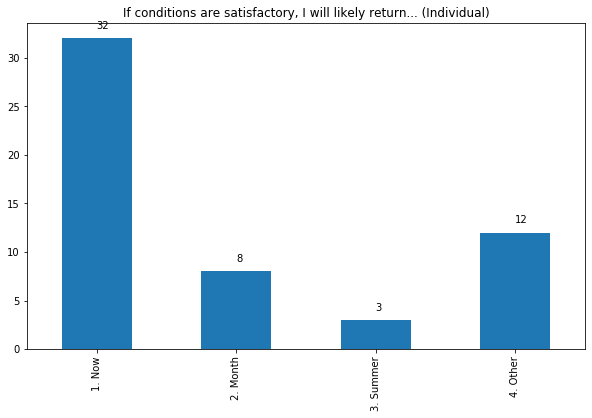

In [224]:
plotNormalized(csv, 16, 4)

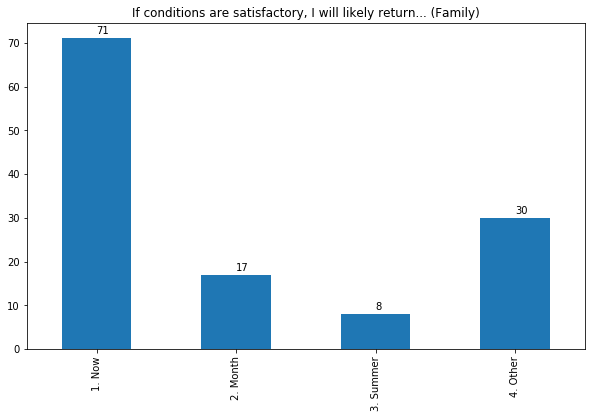

In [223]:
plotNormalized(csv, 16, 4, True)

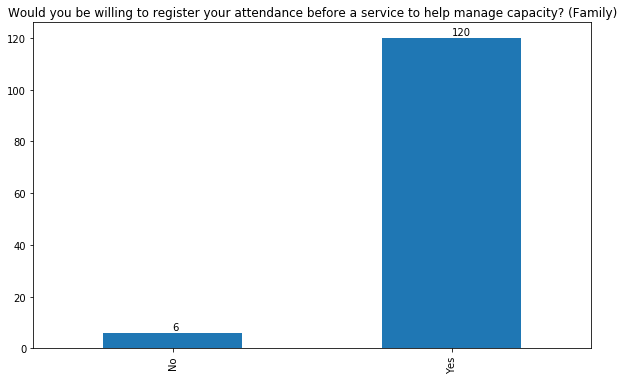

In [225]:
#plotGrouping(getGrouping(csv, 5, True))
plotNormalized(csv, 5, 0, True)

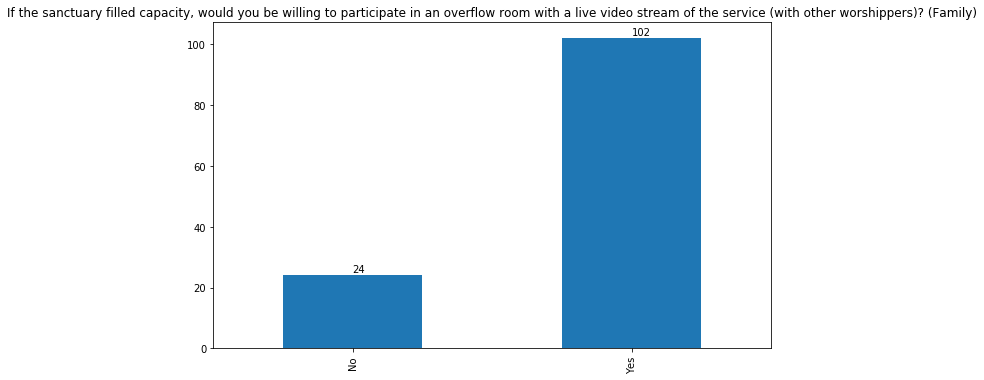

In [226]:
#plotGrouping(getGrouping(csv, 6, True))
plotNormalized(csv, 6, 0, True)

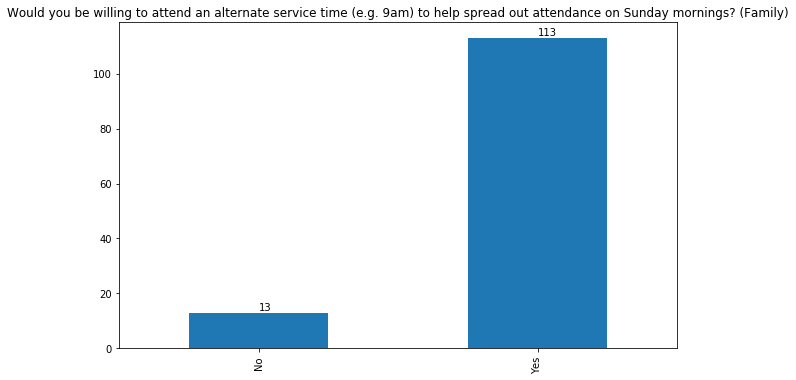

In [227]:
#plotGrouping(getGrouping(csv, 7, True))
plotNormalized(csv, 7, 0, True)

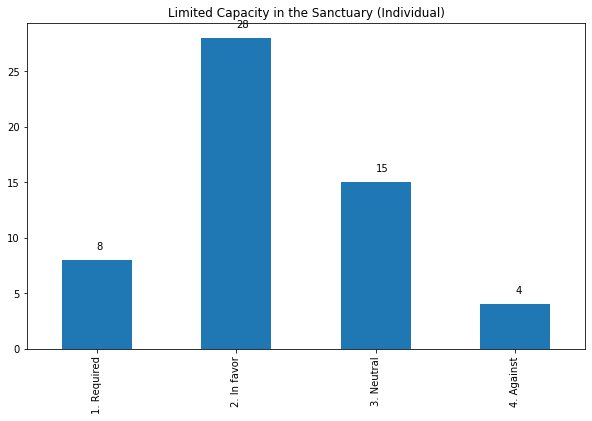

In [157]:
plotNormalized(csv, 17)

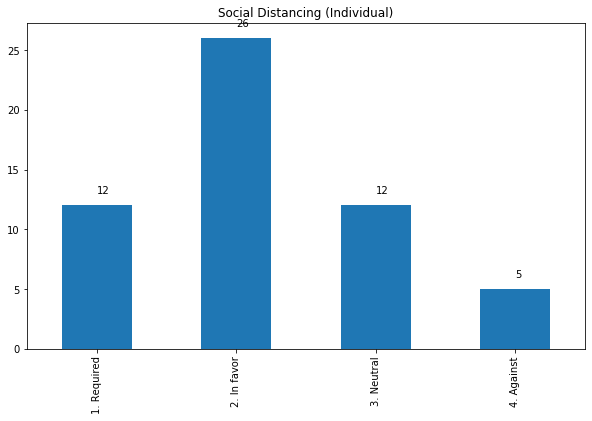

In [149]:
plotNormalized(csv, 18)

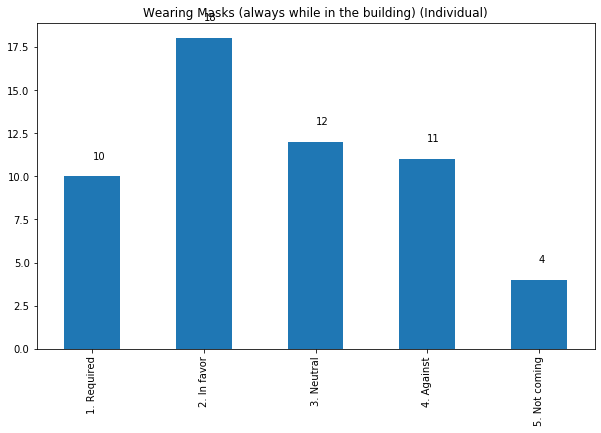

In [150]:
plotNormalized(csv, 19)

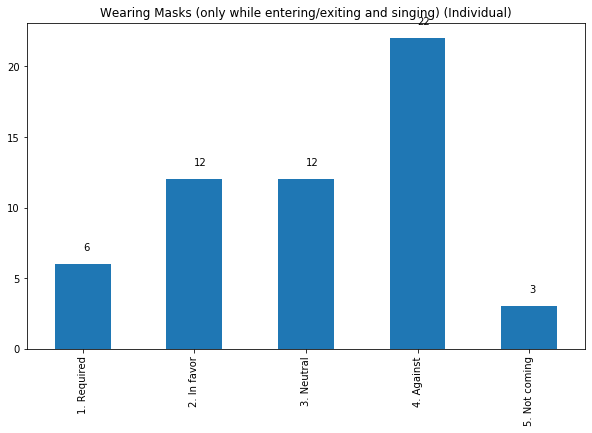

In [151]:
plotNormalized(csv, 20)

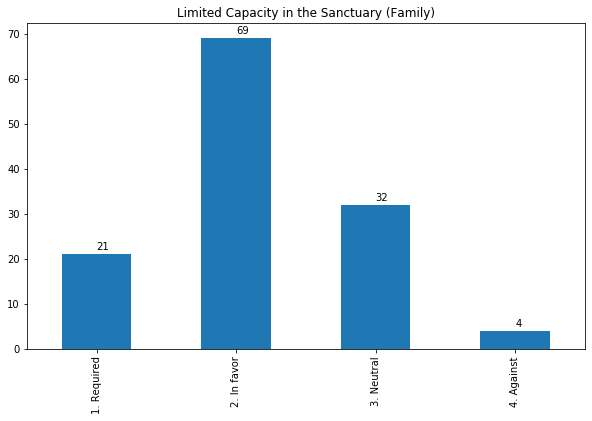

In [161]:
plotNormalized(csv, 17, byfam=True)

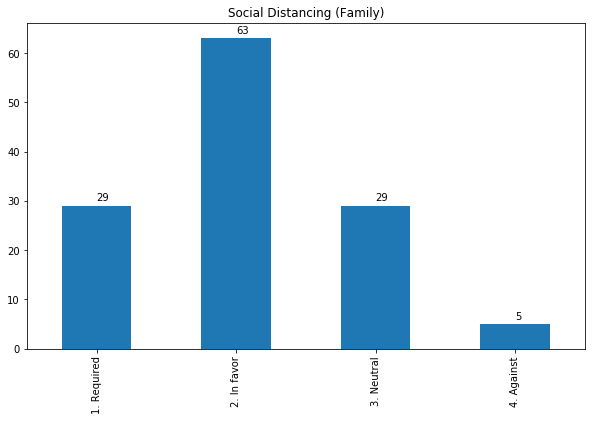

In [162]:
plotNormalized(csv, 18, byfam=True)

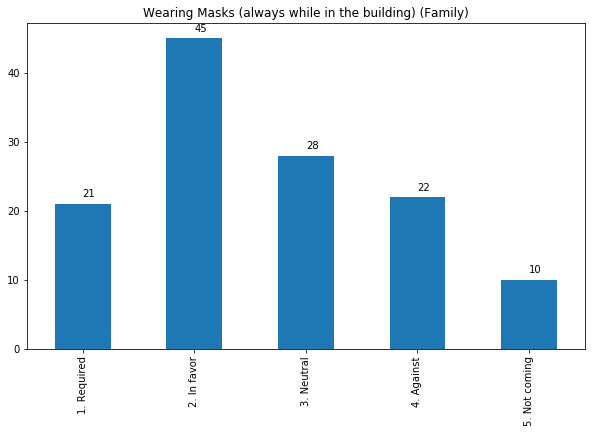

In [163]:
plotNormalized(csv, 19, byfam=True)

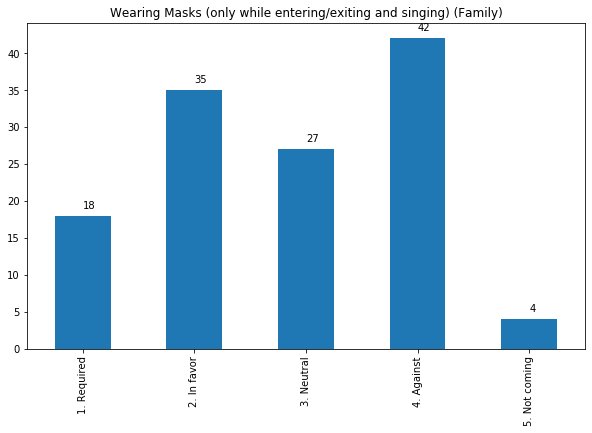

In [164]:
plotNormalized(csv, 20, byfam=True)

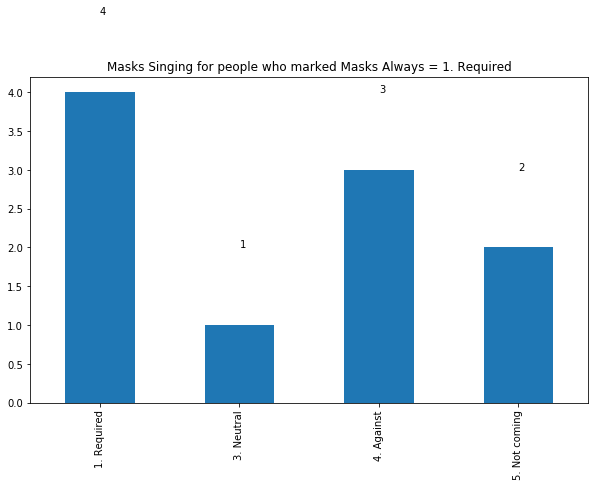

In [172]:
fltr="1. Required"
plotGrouping(getGrouping(csv[csv['Masks Always'].isin([fltr])],20),altTitle="Masks Singing for people who marked Masks Always = {}".format(fltr))

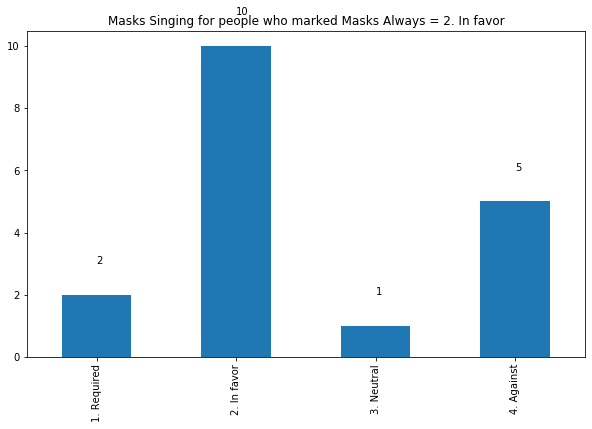

In [174]:
fltr="2. In favor"
plotGrouping(getGrouping(csv[csv['Masks Always'].isin([fltr])],20),altTitle="Masks Singing for people who marked Masks Always = {}".format(fltr))

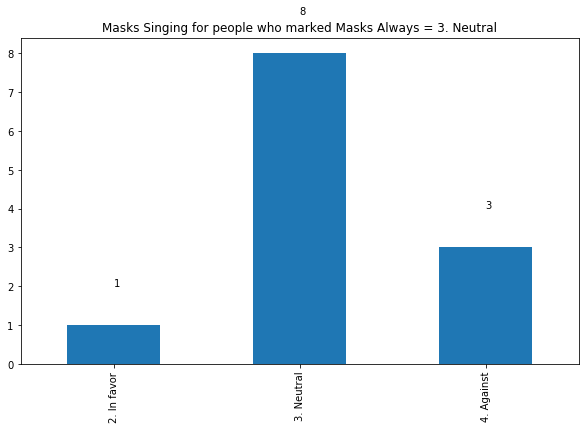

In [175]:
fltr="3. Neutral"
plotGrouping(getGrouping(csv[csv['Masks Always'].isin([fltr])],20),altTitle="Masks Singing for people who marked Masks Always = {}".format(fltr))

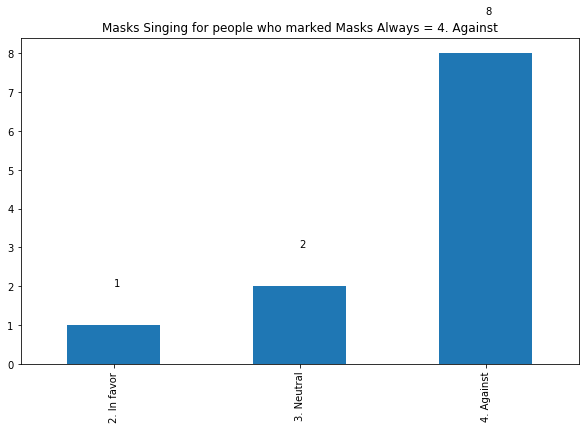

In [176]:
fltr="4. Against"
plotGrouping(getGrouping(csv[csv['Masks Always'].isin([fltr])],20),altTitle="Masks Singing for people who marked Masks Always = {}".format(fltr))

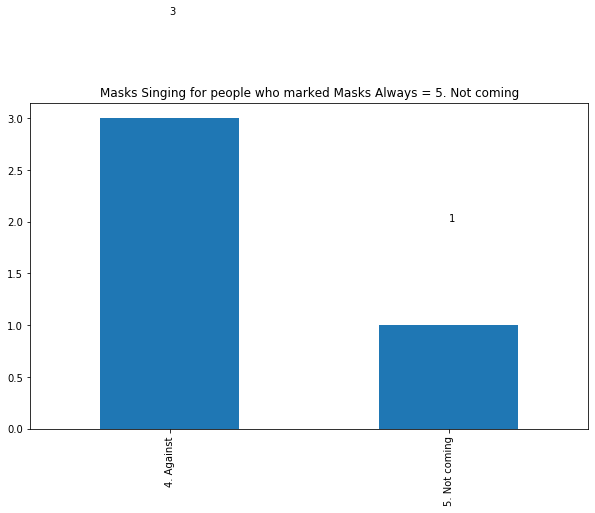

In [177]:
fltr="5. Not coming"
plotGrouping(getGrouping(csv[csv['Masks Always'].isin([fltr])],20),altTitle="Masks Singing for people who marked Masks Always = {}".format(fltr))